In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import train_test_split
import statsmodels as sms
mpl.rc('figure', max_open_warning = 0)

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/data_stage.csv')
#data=data.set_index('Date',drop=True)
data.Date[0]

'2022-04-29 15:00:00'

In [ ]:
data=data.sort_values(by=['Code_ATM','Date'])
for i in range(len(data)):
  data.Date[i] = datetime.datetime.strptime(data.Date[i],"%Y-%m-%d %H:%M:%S")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data=data.reset_index(drop=True)
#adding a column with only the day to make a groupby day
codes=data['Code_ATM'].unique()
l=[]
for i in range(len(codes)):
  l.append((data[data['Code_ATM']==codes[i]].drop(columns=['Code_ATM']),codes[i]))
l1=[]
for i in range(len(l)):
  l1.append((l[i][0].reset_index(drop=True),codes[i]))
  for j in range(len(l1[i][0])):
    l1[i][0]['Date'][j]=l1[i][0]['Date'][j].date()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
#this takes up alot of memory space so execute only if you need it
#for i in range (len(codes)):
  #l[i][0].plot(y='Montant' ,figsize=(150,15))
#to make this cell work make the date column the index one

In [ ]:
d=[]
for k in range(len(l1)):
  d.append(l1[k][0].groupby(by=['Date']).sum())
  for i in range(len(d[k])):
    if d[k].working[i]>0:
      d[k].working[i]=1
    if d[k].religious[i]>0:
      d[k].religious[i]=1
    if d[k].school[i]>0:
      d[k].school[i]=1




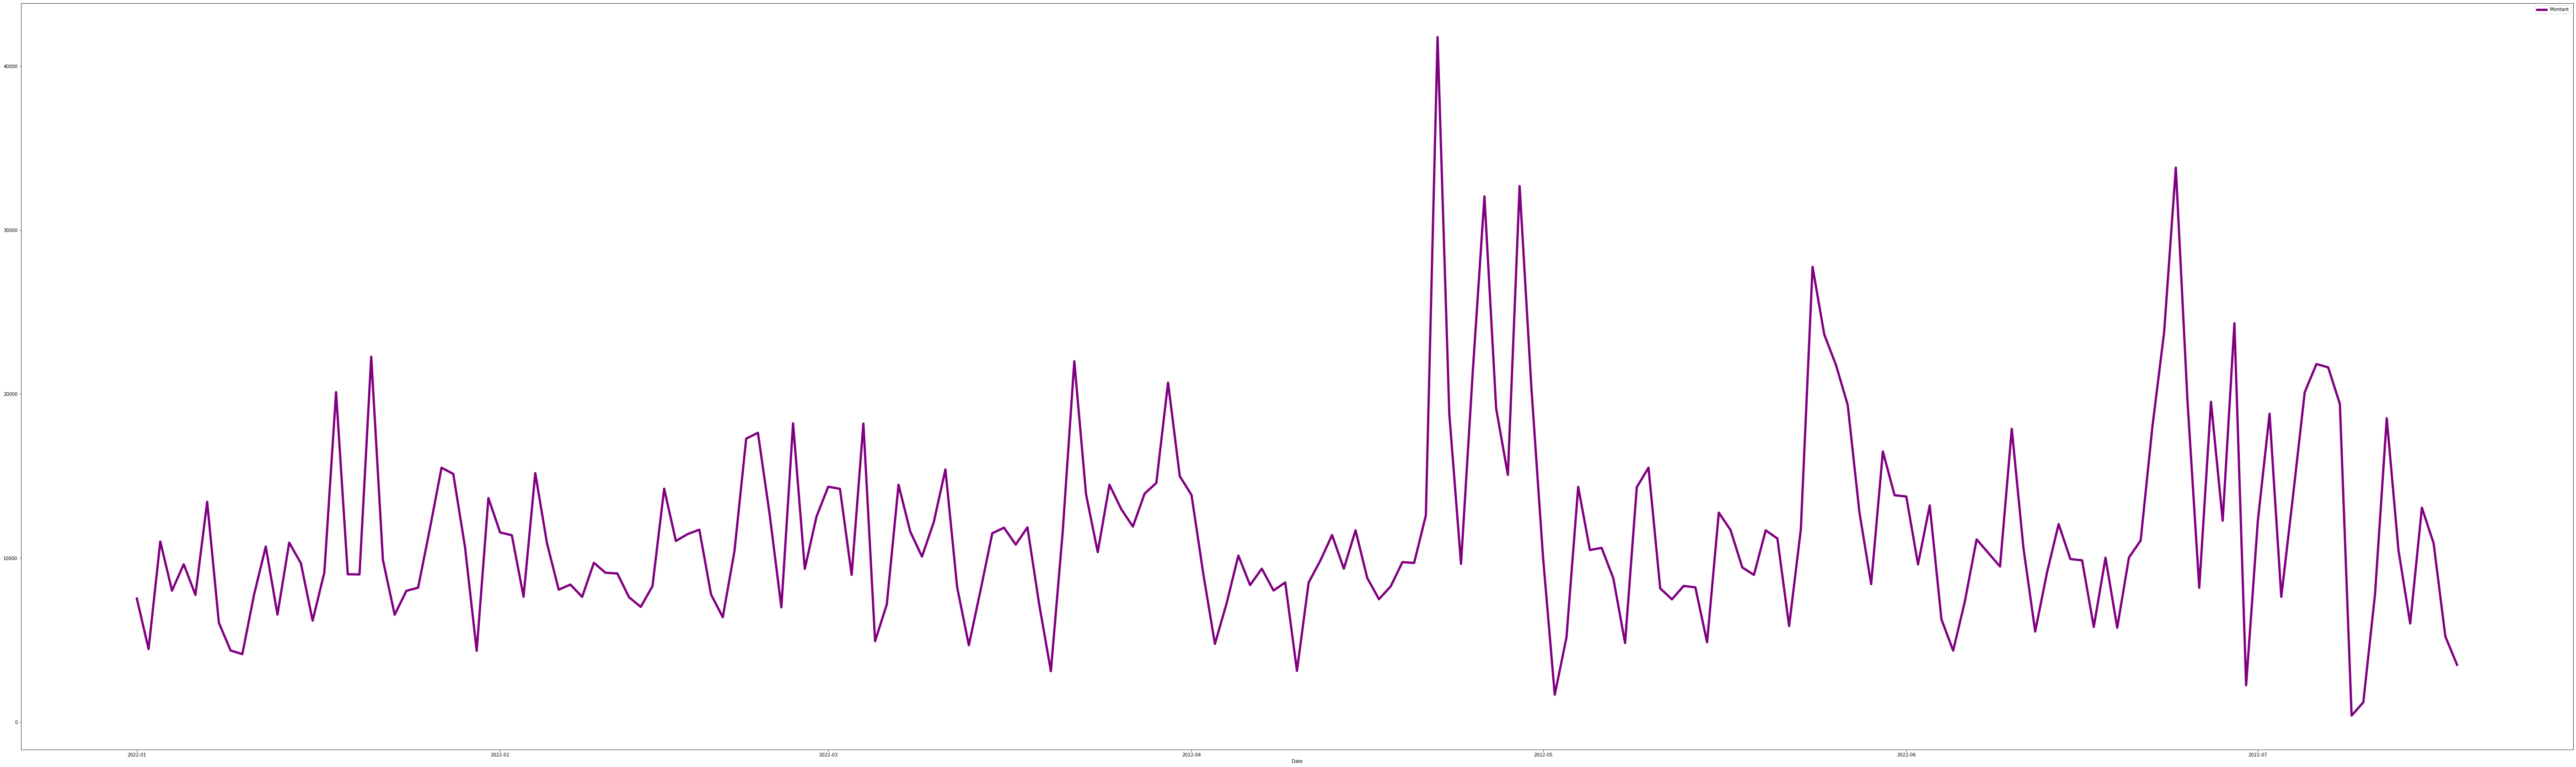

In [ ]:
d[0].plot(y='Montant',figsize=(100,30),color='purple', linewidth=5)

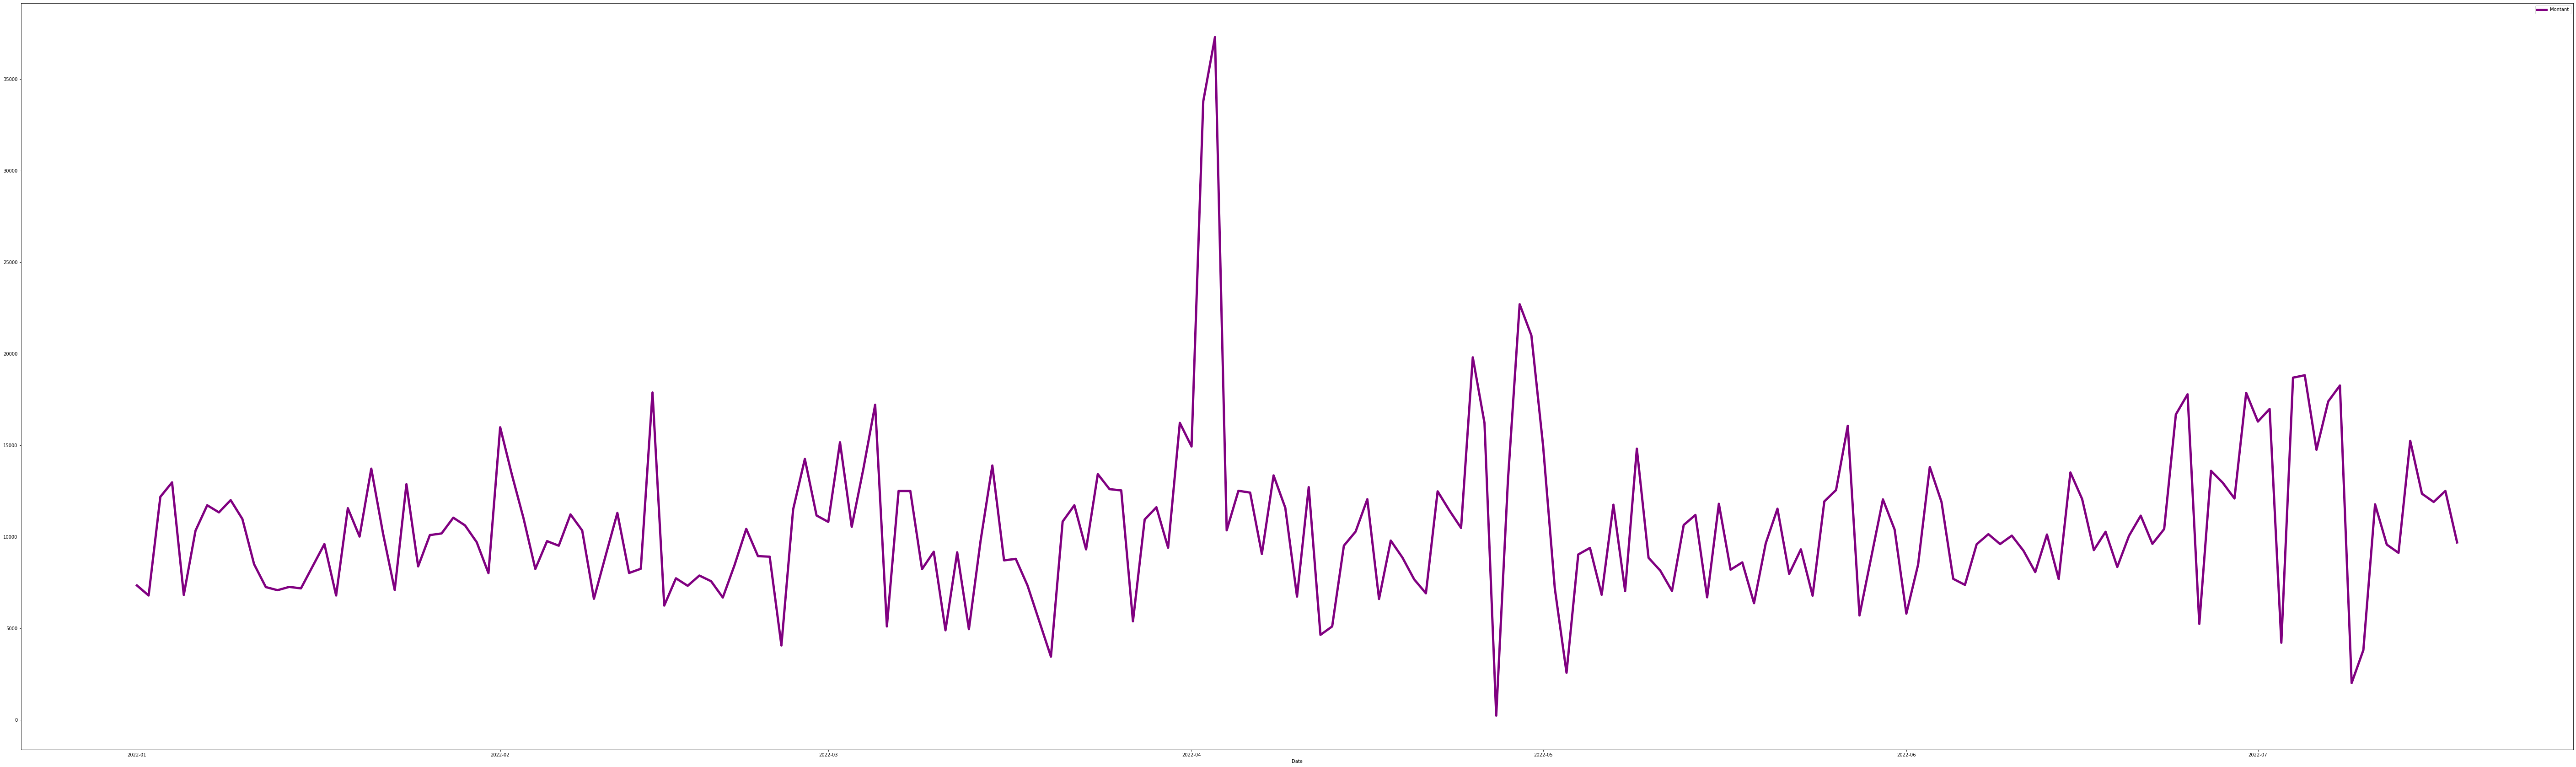

In [ ]:
d[1].plot(y='Montant',figsize=(100,30),color='purple', linewidth=5)

In [ ]:
for i in range(len(d)):
  d[i]=d[i].reset_index()


In [ ]:
days=[]
for j in range (len(d)):
  day=[]
  for i in range (len(d[j])):
    day.append(d[j]['Date'][i].weekday())
  days.append(day)



In [ ]:
for i in range(len(days)):
  d[i]['weekly']=days[i]
  d[i]=d[i].drop(columns=['Date'])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
features=[]
X=[]
y=[]
Xtrain=[i for i in range(len(days))]
Xtest=[i for i in range(len(days))]
ytrain=[i for i in range(len(days))]
ytest=[i for i in range(len(days))]


In [ ]:
for i in range(len(days)):
  
  features.append(d[i].copy())
  X.append(features[i].copy().drop(columns = ['Montant']))
  y.append(features[i]['Montant'].copy())
  X[i]
  Xtrain[i], Xtest[i], ytrain[i], ytest[i] = train_test_split(X[i], y[i], shuffle= False, test_size = 0.2, random_state = 42)
  #print('length of Xtrain and Xtest: ', len(Xtrain[i]), len(Xtest[i]))
  #print('length of ytrain and ytest: ', len(ytrain[i]), len(ytest[i]))

In [ ]:
linear = LinearRegression()
lin_pred=[]
for i in range(len(days)):
  linear.fit(Xtrain[i], ytrain[i])
# make predictions
  lin_pred.append(linear.predict(Xtest[i]))


In [ ]:
#for i in range (len(days)):
  #f=pd.DataFrame(columns=['ytest','lin_pred'])
  #f['ytest']=ytest[i]
  #f['lin_pred']=lin_pred[i]
  #f[['ytest','lin_pred']].plot(figsize=(10,10))

In [ ]:
import sklearn.metrics as sm
for i in range(len(days)):
  print("Mean absolute error =", round(sm.mean_absolute_error(ytest[i], lin_pred[i]), 2)) 
  print("Mean squared error =", round(sm.mean_squared_error(ytest[i], lin_pred[i]), 2)) 
  print("Median absolute error =", round(sm.median_absolute_error(ytest[i], lin_pred[i]), 2)) 
  print("Explain variance score =", round(sm.explained_variance_score(ytest[i], lin_pred[i]), 2)) 
  print("R2 score =", round(sm.r2_score(ytest[i], lin_pred[i]), 2))

Mean absolute error = 2387.38
Mean squared error = 10478930.23
Median absolute error = 1685.85
Explain variance score = 0.84
R2 score = 0.8
Mean absolute error = 1859.63
Mean squared error = 6847964.69
Median absolute error = 1000.05
Explain variance score = 0.71
R2 score = 0.61
Mean absolute error = 2922.13
Mean squared error = 12905592.36
Median absolute error = 2414.46
Explain variance score = 0.79
R2 score = 0.78
Mean absolute error = 5269.29
Mean squared error = 64663445.24
Median absolute error = 3329.88
Explain variance score = 0.89
R2 score = 0.89
Mean absolute error = 1249.89
Mean squared error = 2789421.47
Median absolute error = 943.44
Explain variance score = 0.78
R2 score = 0.76
Mean absolute error = 1264.01
Mean squared error = 2532312.33
Median absolute error = 1062.91
Explain variance score = 0.9
R2 score = 0.88
Mean absolute error = 893.51
Mean squared error = 1298127.82
Median absolute error = 609.84
Explain variance score = 0.82
R2 score = 0.8
Mean absolute error = 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Mean absolute error = 2387.38
Mean squared error = 10478930.23
Median absolute error = 1685.85
Explain variance score = 0.84
R2 score = 0.8


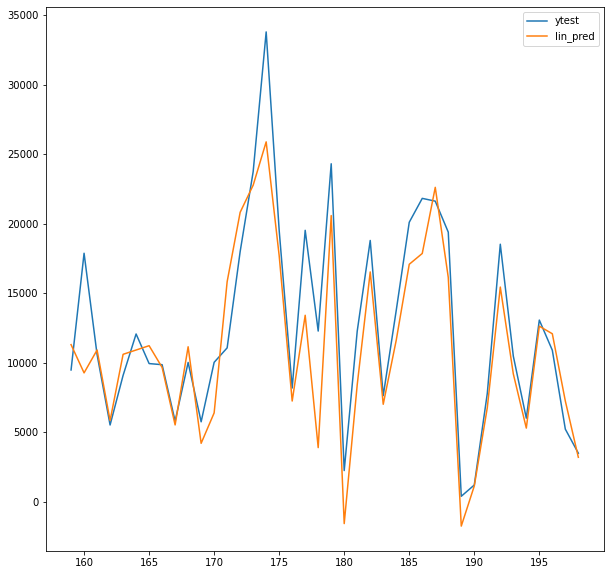

In [ ]:
f=pd.DataFrame(columns=['ytest','lin_pred'])
f['ytest']=ytest[0]
f['lin_pred']=lin_pred[0]
f[['ytest','lin_pred']].plot(figsize=(10,10))
print("Mean absolute error =", round(sm.mean_absolute_error(ytest[0], lin_pred[0]), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(ytest[0], lin_pred[0]), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(ytest[0], lin_pred[0]), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(ytest[0], lin_pred[0]), 2)) 
print("R2 score =", round(sm.r2_score(ytest[0], lin_pred[0]), 2))

In [ ]:
from google.colab import files
df=pd.DataFrame(ytest[0],columns=['test set'])
df.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')